
# Weather Dataset Collection: IndiaWeatherInsights
### **Project Overview:**  
- This notebook demonstrates a scalable data collection process using the OpenWeatherMap API.
- The goal is to collect both historical and real-time weather data for 20 Indian cities.
- We will capture key parameters such as temperature, humidity, and wind speed.
- The collected data is stored in a CSV file named **IndiaWeatherInsights.csv**.  

### **Use Case Demonstration:**  
- One potential use case for this dataset is to analyze weather trends across major Indian cities. 
- For instance, one could explore correlations between temperature and humidity over time or identify urban heat island effects by comparing cities. This analysis could be useful for urban planning or climate research.

### **Suggested Python Tools:**  
 - `requests` for API calls  
 - `pandas` for data manipulation and CSV handling  
 - `matplotlib` for visualization

### **Note on Data Collection Frequency:**  
- In a real-world scenario, you might schedule this script to run periodically (e.g., hourly or daily) over a month using a scheduler (like `cron` or Windows Task Scheduler). For demonstration, this notebook simulates periodic data collection using a loop with a short delay.



## 1. Setup and Imports
- We import the necessary libraries and set up our global variables.


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time  # Used to simulate periodic collection (adjust or remove in production)

# Set matplotlib inline for Jupyter Notebook
%matplotlib inline

# Replace with your actual OpenWeatherMap API key
API_KEY = "aac405e628f9c30a047d3de13192a7f7"

# Base URL for current weather data from OpenWeatherMap
BASE_URL = "https://api.openweathermap.org/data/2.5/weather"

# List of 20 Indian cities
cities = [
    "Delhi", "Mumbai", "Kolkata", "Chennai", "Bengaluru",
    "Hyderabad", "Pune", "Ahmedabad", "Jaipur", "Lucknow",
    "Kanpur", "Nagpur", "Indore", "Surat", "Patna",
    "Vadodara", "Bhopal", "Coimbatore", "Visakhapatnam", "Guwahati"
]


C:\Users\iitia\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 2. Function to Fetch Weather Data
- This function makes an API call to OpenWeatherMap for a given city and returns the temperature, humidity, wind speed, and timestamp.


In [2]:
def get_weather_data(city):
    """
    Fetch weather data for a specified city using OpenWeatherMap API.
    
    Parameters:
        city (str): Name of the city to fetch weather data for.
    
    Returns:
        dict: A dictionary containing city, temperature, humidity, wind speed, and timestamp.
              Returns None if the API call fails.
    """
    params = {
        "q": city,
        "appid": API_KEY,
        "units": "metric"  # Temperature in Celsius
    }
    
    try:
        response = requests.get(BASE_URL, params=params)
        data = response.json()
        
        # Check if the response contains an error message
        if response.status_code != 200:
            print(f"Error fetching data for {city}: {data.get('message', 'Unknown error')}")
            return None
        
        # Extract required parameters
        weather_info = {
            "city": city,
            "temperature": data["main"]["temp"],
            "humidity": data["main"]["humidity"],
            "wind_speed": data["wind"]["speed"],
            "timestamp": datetime.now()  # Current date and time
        }
        return weather_info
    except Exception as e:
        print(f"Exception occurred for {city}: {e}")
        return None


## 3. Data Collection Loop
- For demonstration purposes, we simulate periodic data collection by iterating multiple times with a delay.  
- **Note:** In a production environment, we would schedule this loop to run periodically (e.g., once per hour or once per day) over a month.


In [3]:
# Number of simulation iterations (adjust as needed)
iterations = 5  # For demonstration; in practice, this could be 720 (for 30 days x 24 hours) or similar.

# List to store collected weather data
weather_data = []

print("Starting data collection simulation...")

for i in range(iterations):
    print(f"\nIteration {i+1}/{iterations} at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    for city in cities:
        data = get_weather_data(city)
        if data:
            weather_data.append(data)
        # Sleep for 1 second between city calls to avoid hitting the API too rapidly
        time.sleep(1)
    
    # Wait for a short period before the next iteration (for demo, 5 seconds; adjust in production)
    print("Waiting for next data collection cycle...\n")
    time.sleep(5)

print("Data collection simulation complete.")


Starting data collection simulation...

Iteration 1/5 at 2025-03-09 14:08:39
Waiting for next data collection cycle...


Iteration 2/5 at 2025-03-09 14:09:25
Waiting for next data collection cycle...


Iteration 3/5 at 2025-03-09 14:10:11
Waiting for next data collection cycle...


Iteration 4/5 at 2025-03-09 14:10:58
Waiting for next data collection cycle...


Iteration 5/5 at 2025-03-09 14:11:44
Waiting for next data collection cycle...

Data collection simulation complete.


## 4. Data Storage: Saving to CSV
- We convert the collected data into a pandas DataFrame and save it as a CSV file named **IndiaWeatherInsights.csv**.


In [4]:
# Convert list of dictionaries to DataFrame
df_weather = pd.DataFrame(weather_data)

# Display the first few rows of the DataFrame
print("Sample of the collected data:")
display(df_weather.head())

# Save the DataFrame to a CSV file
csv_filename = "IndiaWeatherInsights.csv"
df_weather.to_csv(csv_filename, index=False)
print(f"Data successfully saved to {csv_filename}")


Sample of the collected data:


,city,temperature,humidity,wind_speed,timestamp
0,Delhi,32.39,10,1.24,2025-03-09 14:08:40.694664
1,Mumbai,29.08,53,6.71,2025-03-09 14:08:42.712820
2,Kolkata,33.74,24,2.30,2025-03-09 14:08:44.748007
3,Chennai,29.11,52,4.93,2025-03-09 14:08:46.839187
4,Bengaluru,33.42,13,5.23,2025-03-09 14:08:48.889148


Data successfully saved to IndiaWeatherInsights.csv


## 5. Use Case Demonstration: Weather Trend Analysis
- As a demonstration of the dataset's potential use, we perform a simple analysis by plotting temperature trends for a selected city over time.


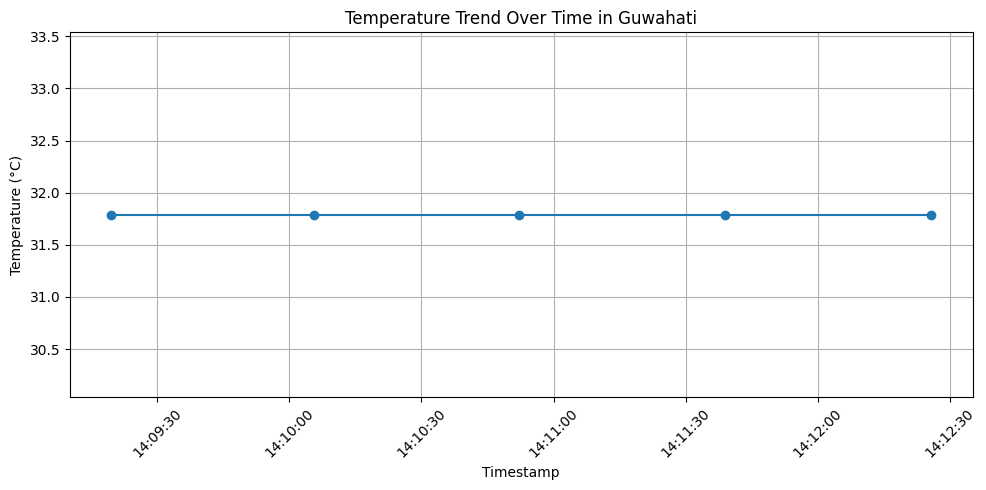

In [6]:
# Select a city for demonstration (e.g., "Delhi")
selected_city = "Guwahati"
city_data = df_weather[df_weather["city"] == selected_city].copy()

# Ensure the timestamp column is in datetime format (if not already)
city_data["timestamp"] = pd.to_datetime(city_data["timestamp"])

# Sort data by timestamp
city_data.sort_values("timestamp", inplace=True)

# Plot temperature trend over time for the selected city
plt.figure(figsize=(10, 5))
plt.plot(city_data["timestamp"], city_data["temperature"], marker='o', linestyle='-')
plt.title(f"Temperature Trend Over Time in {selected_city}")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## 6. Conclusion
- In this notebook, we implemented a scalable method to collect weather data from the OpenWeatherMap API for 20 Indian cities. The dataset, named **IndiaWeatherInsights**, stores key parameters such as temperature, humidity, and wind speed along with timestamps. We also demonstrated a simple use case by visualizing the temperature trend for Delhi over time.

- **This dataset can be further explored for various analyses such as:**
    - Correlation studies between temperature and humidity.
    - Comparative analysis of weather patterns across cities.
    - Forecasting and trend analysis for climate research.

#### Future work could include integrating historical weather data and more advanced statistical or machine learning analyses.
